In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_path = 'data/chest_xray/train'
valid_path = 'data/chest_xray/val'
test_path = 'data/chest_xray/test'

In [190]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
#         batch_size=16,
        classes=['pneumonia','normal'])
validation_generator = test_datagen.flow_from_directory(
        directory=valid_path,
        target_size=(224, 224),
        batch_size=16,
        classes=['pneumonia','normal'])
test_generator = test_datagen.flow_from_directory(
        directory=test_path,
        target_size=(224, 224),
        batch_size=16,
        classes=['pneumonia','normal'])

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [193]:
train_imgs, train_labels = next(train_generator)

In [191]:
val_img, val_labels = next(validation_generator)

In [194]:
train_imgs.shape

(32, 224, 224, 3)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

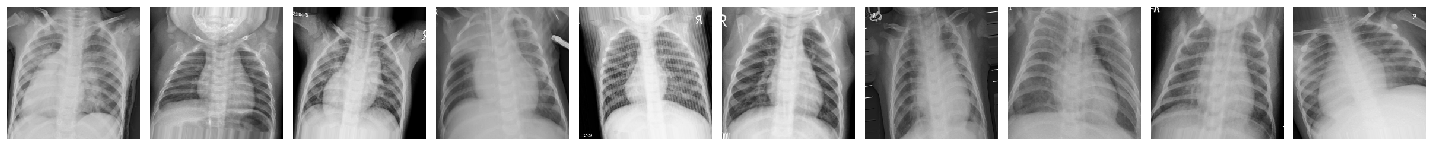

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [195]:
plotImages(train_imgs)
print(train_labels)

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
base_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [23]:
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [24]:
base_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
base_model.fit(x=train_generator, validation_data=validation_generator, epochs=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 1 steps
Epoch 1/5
163/163 - 244s - loss: 0.7588 - accuracy: 0.7855 - val_loss: 1.0647 - val_accuracy: 0.6250
Epoch 2/5
163/163 - 250s - loss: 0.2911 - accuracy: 0.8852 - val_loss: 0.6535 - val_accuracy: 0.8125
Epoch 3/5
163/163 - 245s - loss: 0.2387 - accuracy: 0.9087 - val_loss: 0.5305 - val_accuracy: 0.7500
Epoch 4/5
163/163 - 246s - loss: 0.2201 - accuracy: 0.9103 - val_loss: 0.8184 - val_accuracy: 0.6875
Epoch 5/5
163/163 - 238s - loss: 0.1874 - accuracy: 0.9291 - val_loss: 1.1729 - val_accuracy: 0.6250


In [27]:
base_model.fit(x=train_generator, validation_data=test_generator, epochs=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 39 steps
Epoch 1/5
163/163 - 256s - loss: 0.1946 - accuracy: 0.9264 - val_loss: 0.4053 - val_accuracy: 0.8558
Epoch 2/5
163/163 - 219s - loss: 0.1808 - accuracy: 0.9260 - val_loss: 0.4778 - val_accuracy: 0.8622
Epoch 3/5
163/163 - 196s - loss: 0.1734 - accuracy: 0.9323 - val_loss: 0.5491 - val_accuracy: 0.8622
Epoch 4/5
163/163 - 197s - loss: 0.1636 - accuracy: 0.9365 - val_loss: 0.8367 - val_accuracy: 0.7804
Epoch 5/5
163/163 - 196s - loss: 0.1601 - accuracy: 0.9425 - val_loss: 0.5795 - val_accuracy: 0.9006


Confusion matrix, without normalization
[[4 4]
 [7 1]]


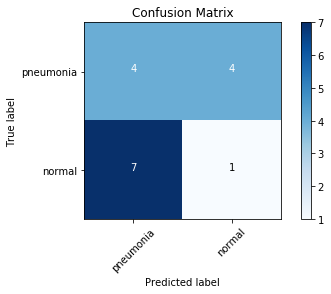

In [66]:
predictions = base_model.predict(x=validation_generator, steps = 1, verbose=0)
cm = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions, axis=-1))

cm_plot_labels = ['pneumonia','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [67]:
print(classification_report(validation_generator.classes, np.argmax(predictions, axis=-1)))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.20      0.12      0.15         8

    accuracy                           0.31        16
   macro avg       0.28      0.31      0.29        16
weighted avg       0.28      0.31      0.29        16



In [32]:
from keras import layers
from keras import models

cnn_base_model = models.Sequential()
cnn_base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_base_model.add(layers.MaxPooling2D((2, 2)))
cnn_base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_base_model.add(layers.MaxPooling2D((2, 2)))
cnn_base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_base_model.add(layers.Flatten())
cnn_base_model.add(layers.Dense(64, activation='relu'))
cnn_base_model.add(layers.Dense(2, activation='softmax'))

In [33]:
cnn_base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [34]:
cnn_base_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
cnn_base_model.fit(x=train_generator, validation_data=test_generator, epochs=5, verbose=2)

Epoch 1/5
 - 221s - loss: 0.8530 - accuracy: 0.7673 - val_loss: 0.4561 - val_accuracy: 0.6715
Epoch 2/5
 - 205s - loss: 0.3011 - accuracy: 0.8779 - val_loss: 0.4911 - val_accuracy: 0.8237
Epoch 3/5
 - 207s - loss: 0.2627 - accuracy: 0.8982 - val_loss: 0.1458 - val_accuracy: 0.8718
Epoch 4/5
 - 214s - loss: 0.2608 - accuracy: 0.9080 - val_loss: 0.2122 - val_accuracy: 0.8093
Epoch 5/5
 - 200s - loss: 0.2308 - accuracy: 0.9201 - val_loss: 0.3809 - val_accuracy: 0.8718


Confusion matrix, without normalization
[[6 2]
 [7 1]]


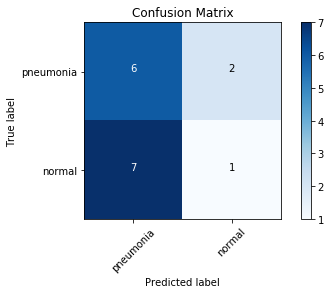

In [51]:
predictions_1 = cnn_base_model.predict(x=validation_generator, steps = 1, verbose=0)
cm_1 = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions_1, axis=-1))

cm_plot_labels = ['pneumonia','normal']
plot_confusion_matrix(cm=cm_1, classes=cm_plot_labels, title='Confusion Matrix')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(validation_generator.classes, np.argmax(predictions_1, axis=-1)))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.33      0.12      0.18         8

    accuracy                           0.44        16
   macro avg       0.40      0.44      0.38        16
weighted avg       0.40      0.44      0.38        16



In [61]:
from keras.regularizers import l2

cnn_base_model_2 = models.Sequential()
cnn_base_model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)))
cnn_base_model_2.add(layers.MaxPooling2D((2, 2)))
cnn_base_model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
cnn_base_model_2.add(layers.MaxPooling2D((2, 2)))
cnn_base_model_2.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01), activation='relu'))
cnn_base_model_2.add(layers.Flatten())
cnn_base_model_2.add(layers.Dense(64, activation='relu'))
cnn_base_model_2.add(layers.Dense(2, activation='softmax'))

In [62]:
cnn_base_model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
cnn_base_model_2.fit(x=train_generator, validation_data=test_generator, epochs=5, verbose=2)

Epoch 1/5
 - 245s - loss: 1.0369 - accuracy: 0.8029 - val_loss: 1.0928 - val_accuracy: 0.7981
Epoch 2/5
 - 270s - loss: 0.3884 - accuracy: 0.8900 - val_loss: 0.3513 - val_accuracy: 0.8317
Epoch 3/5
 - 251s - loss: 0.3037 - accuracy: 0.9039 - val_loss: 0.2069 - val_accuracy: 0.8462
Epoch 4/5
 - 236s - loss: 0.2585 - accuracy: 0.9153 - val_loss: 0.1588 - val_accuracy: 0.8510
Epoch 5/5
 - 250s - loss: 0.2368 - accuracy: 0.9248 - val_loss: 0.3574 - val_accuracy: 0.8077


Confusion matrix, without normalization
[[7 1]
 [7 1]]


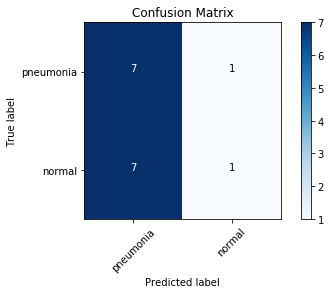

In [64]:
predictions_2 = cnn_base_model_2.predict(x=validation_generator, steps = 1, verbose=0)
cm_2 = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions_2, axis=-1))

cm_plot_labels = ['pneumonia','normal']
plot_confusion_matrix(cm=cm_2, classes=cm_plot_labels, title='Confusion Matrix')

In [76]:
print(classification_report(validation_generator.classes, np.argmax(predictions_2, axis=-1)))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.50      0.12      0.20         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.42        16
weighted avg       0.50      0.50      0.42        16



In [72]:
cnn_base_model_3 = models.Sequential()
cnn_base_model_3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)))
cnn_base_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_base_model_3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
cnn_base_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_base_model_3.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.01), activation='relu'))
cnn_base_model_3.add(layers.Dropout(0.1))
cnn_base_model_3.add(layers.Flatten())
cnn_base_model_3.add(layers.Dense(64, activation='relu'))
cnn_base_model_3.add(layers.Dropout(0.1))
cnn_base_model_3.add(layers.Dense(2, activation='softmax'))

In [73]:
cnn_base_model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
cnn_base_model_3.fit(x=train_generator, validation_data=test_generator, epochs=5, verbose=2)

Epoch 1/5
 - 352s - loss: 1.1225 - accuracy: 0.7761 - val_loss: 0.5058 - val_accuracy: 0.8494
Epoch 2/5
 - 347s - loss: 0.4116 - accuracy: 0.8597 - val_loss: 0.2632 - val_accuracy: 0.8638
Epoch 3/5
 - 324s - loss: 0.3204 - accuracy: 0.8984 - val_loss: 0.3618 - val_accuracy: 0.8702
Epoch 4/5
 - 322s - loss: 0.2832 - accuracy: 0.9045 - val_loss: 0.1464 - val_accuracy: 0.8125
Epoch 5/5
 - 304s - loss: 0.2691 - accuracy: 0.9120 - val_loss: 0.4113 - val_accuracy: 0.8125


Confusion matrix, without normalization
[[7 1]
 [7 1]]


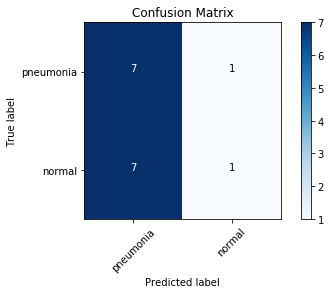

In [75]:
predictions_3 = cnn_base_model_3.predict(x=validation_generator, steps = 1, verbose=0)
cm_3 = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions_3, axis=-1))

cm_plot_labels = ['pneumonia','normal']
plot_confusion_matrix(cm=cm_3, classes=cm_plot_labels, title='Confusion Matrix')

In [77]:
print(classification_report(validation_generator.classes, np.argmax(predictions_3, axis=-1)))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.50      0.12      0.20         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.42        16
weighted avg       0.50      0.50      0.42        16



In [102]:
cnn_base_model_4 = models.Sequential()
cnn_base_model_4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)))
cnn_base_model_4.add(layers.MaxPooling2D((2, 2)))
cnn_base_model_4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
cnn_base_model_4.add(layers.MaxPooling2D((2, 2)))
cnn_base_model_4.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.01), activation='relu'))
cnn_base_model_4.add(layers.Dropout(0.2))
cnn_base_model_4.add(layers.Flatten())
cnn_base_model_4.add(layers.Dense(64, activation='relu'))
cnn_base_model_4.add(layers.Dropout(0.2))
cnn_base_model_4.add(layers.Dense(2, activation='softmax'))

cnn_base_model_4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
cnn_base_model_4.fit(x=train_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
163/163 [==============================] - 290s 2s/step - loss: 1.4648 - accuracy: 0.7655 - val_loss: 0.5637 - val_accuracy: 0.7772
Epoch 2/5
163/163 [==============================] - 288s 2s/step - loss: 0.4480 - accuracy: 0.8610 - val_loss: 0.4486 - val_accuracy: 0.8622
Epoch 3/5
163/163 [==============================] - 285s 2s/step - loss: 0.3305 - accuracy: 0.8867 - val_loss: 0.1291 - val_accuracy: 0.8365
Epoch 4/5
163/163 [==============================] - 293s 2s/step - loss: 0.2936 - accuracy: 0.9110 - val_loss: 0.4204 - val_accuracy: 0.7917
Epoch 5/5
163/163 [==============================] - 291s 2s/step - loss: 0.2572 - accuracy: 0.9124 - val_loss: 0.2530 - val_accuracy: 0.8189


Confusion matrix, without normalization
[[8 0]
 [5 3]]


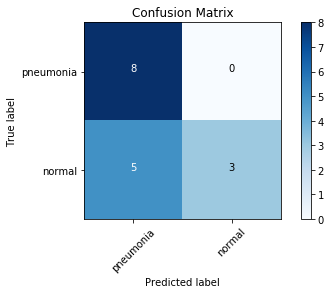

In [120]:
predictions_4 = cnn_base_model_4.predict(x=validation_generator, steps = 1, verbose=0)
cm_4 = confusion_matrix(y_true=validation_generator.classes, y_pred=np.argmax(predictions_4, axis=-1))

cm_plot_labels = ['pneumonia','normal']
plot_confusion_matrix(cm=cm_4, classes=cm_plot_labels, title='Confusion Matrix')

In [121]:
print(classification_report(validation_generator.classes, np.argmax(predictions_4, axis=-1)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.38      0.55         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16



In [122]:
loss,test_accu  = cnn_base_model_4.evaluate_generator(test_generator)

In [128]:
history_dict = cnn_base_model_4.history

In [135]:
history_dict.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

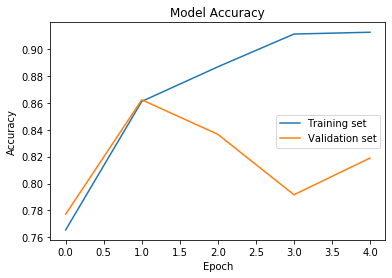

In [138]:
# Accuracy 
plt.plot(history_dict.history['accuracy'])
plt.plot(history_dict.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='center right')
plt.show()

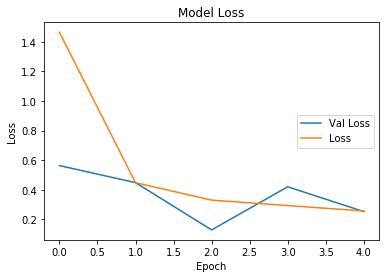

In [140]:
plt.plot(history_dict.history['val_loss'],label='Val Loss')
plt.plot(history_dict.history['loss'],label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()

In [142]:
acc = history_dict.history['accuracy']
val_acc = history_dict.history['val_accuracy']
loss = history_dict.history['loss']
val_loss = history_dict.history['val_loss']
epochs = range(len(acc))

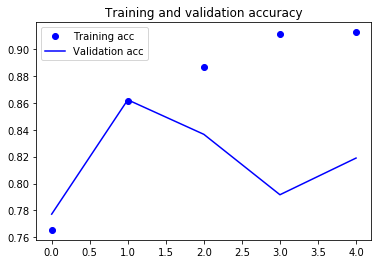

<Figure size 432x288 with 0 Axes>

In [144]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure();

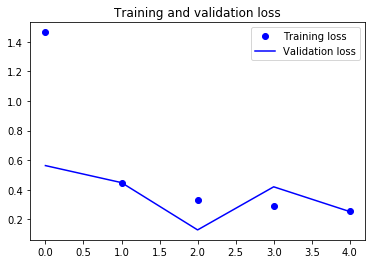

In [145]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

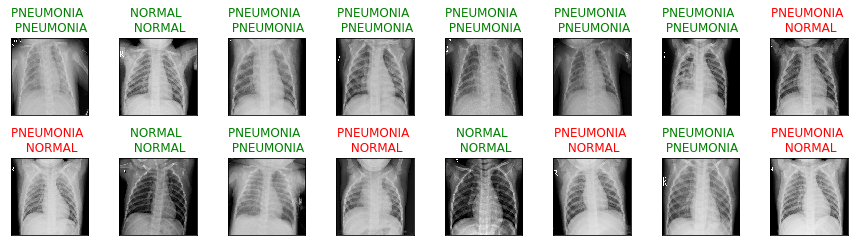

In [192]:
y_hat = np.round(cnn_base_model_4.predict(validation_generator))
y_hat = np.array([x.argmax() for x in list(y_hat)])
val_labels = np.array([x.argmax() for x in list(val_labels)])

img_labels = ['PNEUMONIA', 'NORMAL']

# Checking from Val data set as to how good our model is predicting
fig = plt.figure(figsize=(15, 8))
#fig.tight_layout(hspace=0.2,wspace=0.2)
plt.subplots_adjust(left=0.125,bottom=0.1, 
                    wspace=0.4, hspace=0.35)
for i, idx in enumerate(np.random.choice(val_img.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(val_img[idx]))
    pred_idx = int(np.round(y_hat[idx]))
    true_idx = int(np.round(val_labels[idx]))
    ax.set_title("{} \n {}".format(img_labels[pred_idx], img_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))